## Digit recognition - Neural networks

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tensorflow.autograph.set_verbosity(0)

## Numpy Zip File (npz)

In [2]:
data = np.load('mnist.npz')
for key in data.keys():
    print(key)

x_test
x_train
y_train
y_test


### Training sets

In [3]:
x_train = data["x_train"]
y_train = data["y_train"]
print(x_train.shape)
print(y_train.shape)

#X_train = X_train.reshape(X_train.shape[0], -1)

(60000, 28, 28)
(60000,)


### Testing sets

In [4]:
x_test = data["x_test"]
print(x_test.shape)
y_test = data["y_test"]
print(y_test.shape)

(10000, 28, 28)
(10000,)


## Visualize the results

(60000, 784)


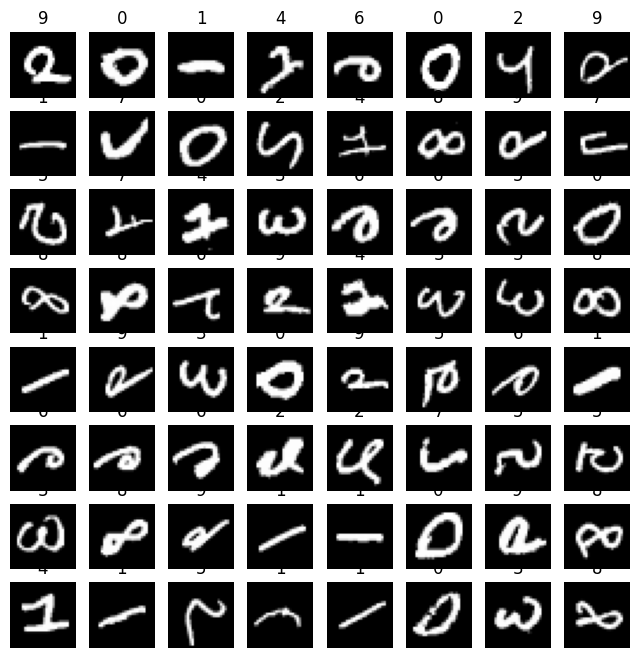

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
x_train_shaped = x_train.reshape(x_train.shape[0], -1)
y_train_shaped = y_train.reshape(y_train.shape[0], -1)
print(x_train_shaped.shape)
m, n = x_train_shaped.shape
fig, axes = plt.subplots(8, 8, figsize = (8, 8))
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    x_random_reshaped = x_train_shaped[random_index].reshape((28, 28)).T
    ax.imshow(x_random_reshaped, cmap = 'gray')
    ax.set_title(y_train_shaped[random_index, 0])
    ax.set_axis_off()

![fishy](./NN_view.png)

In [26]:
model = Sequential(
    [
        tensorflow.keras.Input(shape=(784,)),
        Dense(25, activation = 'sigmoid'),
        Dense(15, activation = 'sigmoid'),
        Dense(1, activation = 'sigmoid'),
    ], name = "my_model"
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                19625     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 20031 (78.25 KB)
Trainable params: 20031 (78.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
layer1_params = 784 * 25 + 25
layer2_params = 25*15 + 15
layer3_params = 15*1 + 1
print("Layer-1: ", layer1_params, "Layer-2: ", layer2_params, "Layer-3: ", layer3_params)
[layer1, layer2, layer3] = model.layers
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1, b1 = {W1.shape, b1.shape}")
print(f"W2, b2 = {W2.shape, b2.shape}")
print(f"W3, b3 = {W3.shape, b3.shape}")

Layer-1:  19625 Layer-2:  390 Layer-3:  16
W1, b1 = ((784, 25), (25,))
W2, b2 = ((25, 15), (15,))
W3, b3 = ((15, 1), (1,))


In [30]:
print(model.layers[2].weights)

[<tf.Variable 'dense_5/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.40507224],
       [-0.4873768 ],
       [-0.16836992],
       [ 0.41469818],
       [ 0.49072987],
       [ 0.5037264 ],
       [ 0.5432759 ],
       [ 0.42862684],
       [ 0.48055822],
       [ 0.21285659],
       [ 0.22347581],
       [ 0.22420377],
       [-0.24517402],
       [ 0.23008162],
       [-0.60467994]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [31]:
model.compile(
    loss = tensorflow.keras.losses.BinaryCrossentropy(),
    optimizer = tensorflow.keras.optimizers.Adam(0.001),
)

In [32]:
model.fit(x_train_shaped, y_train_shaped, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 2s 829us/step - loss: -54.6396
Epoch 2/20
1875/1875 [==============================] - 2s 805us/step - loss: -141.2731
Epoch 3/20
1875/1875 [==============================] - 2s 830us/step - loss: -225.5064
Epoch 4/20
1875/1875 [==============================] - 2s 799us/step - loss: -324.8689
Epoch 5/20
1875/1875 [==============================] - 2s 859us/step - loss: -428.8390
Epoch 6/20
1875/1875 [==============================] - 2s 842us/step - loss: -527.8040
Epoch 7/20
1875/1875 [==============================] - 2s 808us/step - loss: -626.1317
Epoch 8/20
1875/1875 [==============================] - 2s 809us/step - loss: -724.7775
Epoch 9/20
1875/1875 [==============================] - 1s 792us/step - loss: -823.2087
Epoch 10/20
1875/1875 [==============================] - 2s 815us/step - loss: -922.1909
Epoch 11/20
1875/1875 [==============================] - 2s 813us/step - loss: -1020.0282
Epoch 12/20
1875/1875 [=======

In [34]:
prediction1 = model.predict(x_test[1].reshape(1, 784))
print(f"Predicting a zero: {prediction1}")
prediction2 = model.predict(x_test[9999].reshape(1, 784))
print(f"Predicting a one: {prediction2}")

1/1 [==============================] - 0s 63ms/step
Predicting a zero: [[1.]]
1/1 [==============================] - 0s 16ms/step
Predicting a one: [[1.]]


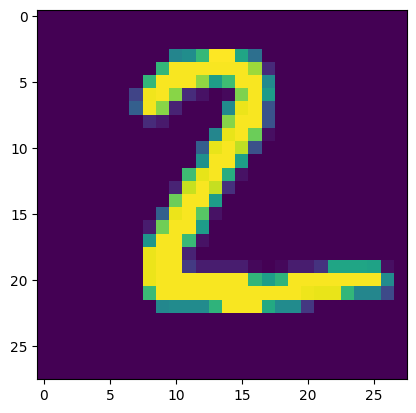

In [35]:
plt.imshow(x_test[1].reshape(28, 28))

In [ ]:
# Some comparison
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X_train.shape
fig, axes = plt.subplots(8, 8, figsize = (8, 8))
fig.tight_layout(pad = 0.1, rect = [0, 0.03, 1, 0.92]) # (left, bot, right, top)
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    #select random indices
    X_random_reshape = X_train[random_index].reshape((28, 28)).T
    ax.imshow(X_random_reshape, cmap='gray')
    predicts = model.predict(X_train[X_random_reshape].reshape(784, 1))
    if predicts >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    ax.set_title(f"{y_train[random_index, 0]}, {yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize = 16)
plt.show()
